In [1]:
from src.kan.kan import KAN, KANLinear
from src.kan.fasterkan import FasterKAN
import torch
from torch import nn
from time import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# use gui backend for matplotlib
matplotlib.use(matplotlib.get_backend())

def num_params(model): return sum(p.numel() for p in model.parameters() if p.requires_grad)

model_kan_32 = KAN([12,32,2])
model_kan_16 = KAN([12,16,2])
model_mlp_256 = nn.Sequential(nn.Linear(12,256), nn.ReLU(), nn.Linear(256,2))
model_mlp_512 = nn.Sequential(nn.Linear(12,512), nn.ReLU(), nn.Linear(512,2))
model_mlp_512_256 = nn.Sequential(nn.Linear(12,512), nn.ReLU(), nn.Linear(512,256), nn.ReLU(), nn.Linear(256,2))
model_fasterkan_128_128 = FasterKAN([12,128,128,2])
model_fasterkan_128_64 = FasterKAN([12,128,64,2])
model_fasterkan_64_64 = FasterKAN([12,64,64,2])

print(f"KAN 32: {num_params(model_kan_32)}")
print(f"KAN 16: {num_params(model_kan_16)}")
print(f"MLP 256: {num_params(model_mlp_256)}")
print(f"MLP 512: {num_params(model_mlp_512)}")
print(f"MLP 512 256: {num_params(model_mlp_512_256)}")
print(f"FasterKAN 128-128: {num_params(model_fasterkan_128_128)}")
print(f"FasterKAN 128-64: {num_params(model_fasterkan_128_64)}")
print(f"FasterKAN 64-64: {num_params(model_fasterkan_64_64)}")


KAN 32: 4480
KAN 16: 2240
MLP 256: 3842
MLP 512: 7682
MLP 512 256: 138498
FasterKAN 128-128: 145944
FasterKAN 128-64: 79256
FasterKAN 64-64: 40216


## Visualize

In [2]:
import pandas as pd

df_mlp_256 = pd.read_csv("runs/flappy_bird_mlp_256/flappy_bird_mlp_256.csv")
episodes_mlp_256, rewards_mlp_256 = df_mlp_256["episode"].to_list(), df_mlp_256["best_reward"].to_list()
df_mlp_512 = pd.read_csv("runs/flappy_bird_mlp_512/flappy_bird_mlp_512.csv")
episodes_mlp_512, rewards_mlp_512 = df_mlp_512["episode"].to_list(), df_mlp_512["best_reward"].to_list()
df_mlp_512_256 = pd.read_csv("runs/flappy_bird_mlp_512_256/flappy_bird_mlp_512_256.csv")
episodes_mlp_512_256, rewards_mlp_512_256 = df_mlp_512_256["episode"].to_list(), df_mlp_512_256["best_reward"].to_list()
df_fasterkan_128_128 = pd.read_csv("runs/flappy_bird_fasterkan_128_128/flappy_bird_fasterkan_128_128.csv")
episodes_fasterkan_128_128, rewards_fasterkan_128_128 = df_fasterkan_128_128["episode"].to_list(), df_fasterkan_128_128["best_reward"].to_list()
df_fasterkan_128_64 = pd.read_csv("runs/flappy_bird_fasterkan_128_64/flappy_bird_fasterkan_128_64.csv")
episodes_fasterkan_128_64, rewards_fasterkan_128_64 = df_fasterkan_128_64["episode"].to_list(), df_fasterkan_128_64["best_reward"].to_list()
df_fasterkan_64_64 = pd.read_csv("runs/flappy_bird_fasterkan_64_64/flappy_bird_fasterkan_64_64.csv")
episodes_fasterkan_64_64, rewards_fasterkan_64_64 = df_fasterkan_64_64["episode"].to_list(), df_fasterkan_64_64["best_reward"].to_list()

Text(431105, 101.89999999999874, '101.900000')

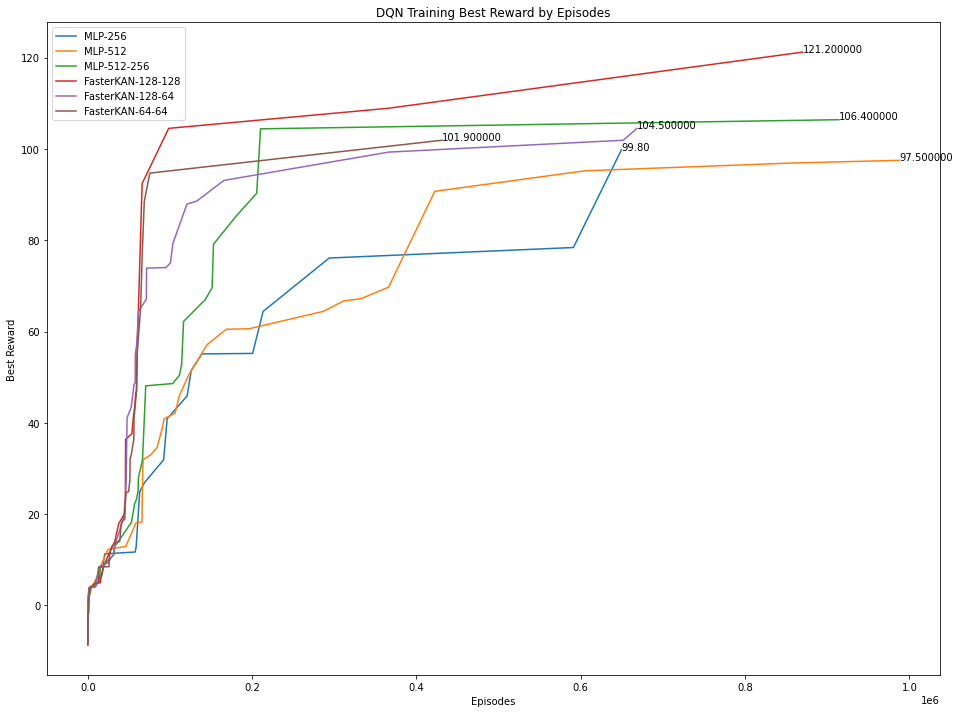

In [5]:
plt.figure(figsize=(16,12))
plt.plot(episodes_mlp_256, rewards_mlp_256, label='MLP-256')
plt.plot(episodes_mlp_512, rewards_mlp_512, label='MLP-512')
plt.plot(episodes_mlp_512_256, rewards_mlp_512_256, label='MLP-512-256')
plt.plot(episodes_fasterkan_128_128, rewards_fasterkan_128_128, label='FasterKAN-128-128')
plt.plot(episodes_fasterkan_128_64, rewards_fasterkan_128_64, label='FasterKAN-128-64')
plt.plot(episodes_fasterkan_64_64, rewards_fasterkan_64_64, label='FasterKAN-64-64')

plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Best Reward")
plt.title("DQN Training Best Reward by Episodes")
# Annotate highest reward by each model
plt.annotate(f"{max(rewards_mlp_256):.2f}", (episodes_mlp_256[-1], max(rewards_mlp_256)))
plt.annotate(f"{max(rewards_mlp_512):2f}", (episodes_mlp_512[-1], max(rewards_mlp_512)))
plt.annotate(f"{max(rewards_mlp_512_256):2f}", (episodes_mlp_512_256[-1], max(rewards_mlp_512_256)))
plt.annotate(f"{max(rewards_fasterkan_128_128):2f}", (episodes_fasterkan_128_128[-1], max(rewards_fasterkan_128_128)))
plt.annotate(f"{max(rewards_fasterkan_128_64):2f}", (episodes_fasterkan_128_64[-1], max(rewards_fasterkan_128_64)))
plt.annotate(f"{max(rewards_fasterkan_64_64):2f}", (episodes_fasterkan_64_64[-1], max(rewards_fasterkan_64_64)))

Average time

In [6]:
# average_time = {"kan_32": 8.66, "mlp_256": 39.52, "mlp_512": 33.38, "kan_16": 8.96, "mlp_512_256":22.18}
# # Plot average time bar chart, plot kan models closer to each other, and mlp models closer to each other
# plt.figure(figsize=(16,12))
# plt.bar(["KAN-32", "KAN-16", "MLP-256", "MLP-512","MLP_512_256"], [average_time["kan_32"], average_time["kan_16"], average_time["mlp_256"], average_time["mlp_512"], average_time["mlp_512_256"]])
# plt.ylabel("Episodes per Second")
# plt.title("Average Training Episodes per Second by Model")
# # Annotation
# plt.annotate(f"{average_time['kan_32']:.2f}", (0, average_time['kan_32']+1), ha='center')
# plt.annotate(f"{average_time['kan_16']:.2f}", (1, average_time['kan_16']+1), ha='center')
# plt.annotate(f"{average_time['mlp_256']:.2f}", (2, average_time['mlp_256']+0.5), ha='center')
# plt.annotate(f"{average_time['mlp_512']:.2f}", (3, average_time['mlp_512']+1), ha='center')

In [7]:
# # Plot scatter plot of number of parameters vs average time
# plt.figure(figsize=(8,6))
# plt.scatter([num_params(model_kan_32), num_params(model_kan_16), num_params(model_mlp_256), num_params(model_mlp_512), num_params(model_mlp_512_256)],
#             [average_time["kan_32"], average_time["kan_16"], average_time["mlp_256"], average_time["mlp_512"], average_time["mlp_512_256"]],
#             c=['r','g','b','y','c'])
# plt.xlabel("Number of Parameters")
# plt.ylabel("Episodes per Second")
# plt.title("Number of Parameters vs Average Episodes Time")
# # Make a legend for the colors
# plt.scatter([],[],c='r',label='KAN-32')
# plt.scatter([],[],c='g',label='KAN-16')
# plt.scatter([],[],c='b',label='MLP-256')
# plt.scatter([],[],c='y',label='MLP-512')
# plt.scatter([],[],c='c',label='MLP-512_256')
# plt.legend()

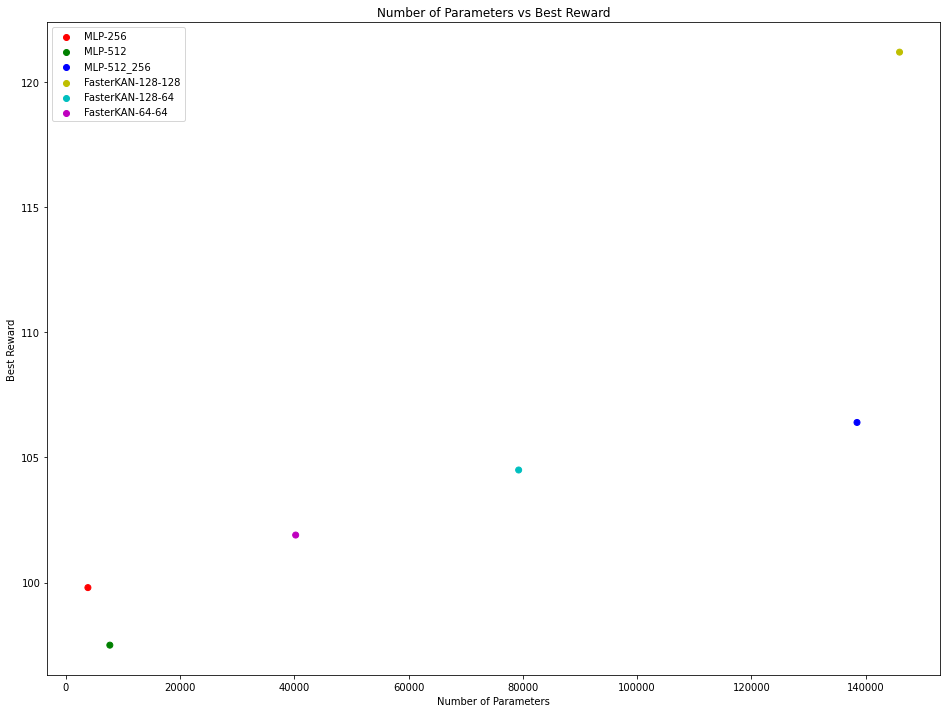

In [36]:
# Plot scatter plot of number of parameters vs best reward, color each model differently
plt.figure(figsize=(16,12))
plt.scatter([num_params(model_mlp_256), num_params(model_mlp_512), num_params(model_mlp_512_256), num_params(model_fasterkan_128_128), num_params(model_fasterkan_128_64), num_params(model_fasterkan_64_64)],
            [max(rewards_mlp_256), max(rewards_mlp_512), max(rewards_mlp_512_256), max(rewards_fasterkan_128_128), max(rewards_fasterkan_128_64), max(rewards_fasterkan_64_64)],
            c=['r','g','b','y','c','m'])
plt.xlabel("Number of Parameters")
plt.ylabel("Best Reward")
plt.title("Number of Parameters vs Best Reward")
# Make a legend for the colors
plt.scatter([],[],c='r',label='MLP-256')
plt.scatter([],[],c='g',label='MLP-512')
plt.scatter([],[],c='b',label='MLP-512_256')
plt.scatter([],[],c='y',label='FasterKAN-128-128')
plt.scatter([],[],c='c',label='FasterKAN-128-64')
plt.scatter([],[],c='m',label='FasterKAN-64-64')
plt.legend()

Testing

In [3]:
# from src.agent import Agent
# import pandas as pd
# # # agent = Agent("flappy_bird_kan_32")
# # # kan_32_scores = agent.test(render=False, num_episodes=1000)
# # # agent = Agent("flappy_bird_mlp_256")
# # # mlp_256_scores = agent.test(render=False, num_episodes=1000)
# # # agent = Agent("flappy_bird_mlp_512")
# # # mlp_512_scores = agent.test(render=False, num_episodes=1000)
# # agent = Agent("flappy_bird_kan_16")
# # kan_16_scores = agent.test(render=False, num_episodes=1000)
# agent = Agent("flappy_bird_mlp_256_256")
# scores = agent.test(render=False, num_episodes=1000)
# scores_df = pd.read_csv("results/scores.csv")
# scores_df["flappy_bird_mlp_256_256"] = scores
# scores_df.to_csv("results/scores.csv", index=False)


In [9]:
# scores_df = pd.DataFrame({"KAN-32": kan_32_scores, "KAN-16": kan_16_scores, "MLP-256": mlp_256_scores, "MLP-512": mlp_512_scores})
# scores_df.to_csv("results/scores.csv", index=False)
scores_df = pd.read_csv("results/scores.csv")
mlp_256_scores, mlp_512_scores = scores_df["MLP-256"].to_list(), scores_df["MLP-512"].to_list()
mlp_512_256_scores = scores_df["MLP-512-256"].to_list()
faster_kan_32_scores = scores_df["fasterkan_32"].to_list()
faster_kan_128_128_scores = scores_df["fasterkan_128_128"].to_list()
faster_kan_128_64_scores = scores_df["fasterkan_128_64"].to_list()
faster_kan_64_64_scores = scores_df["fasterkan_64_64"].to_list()

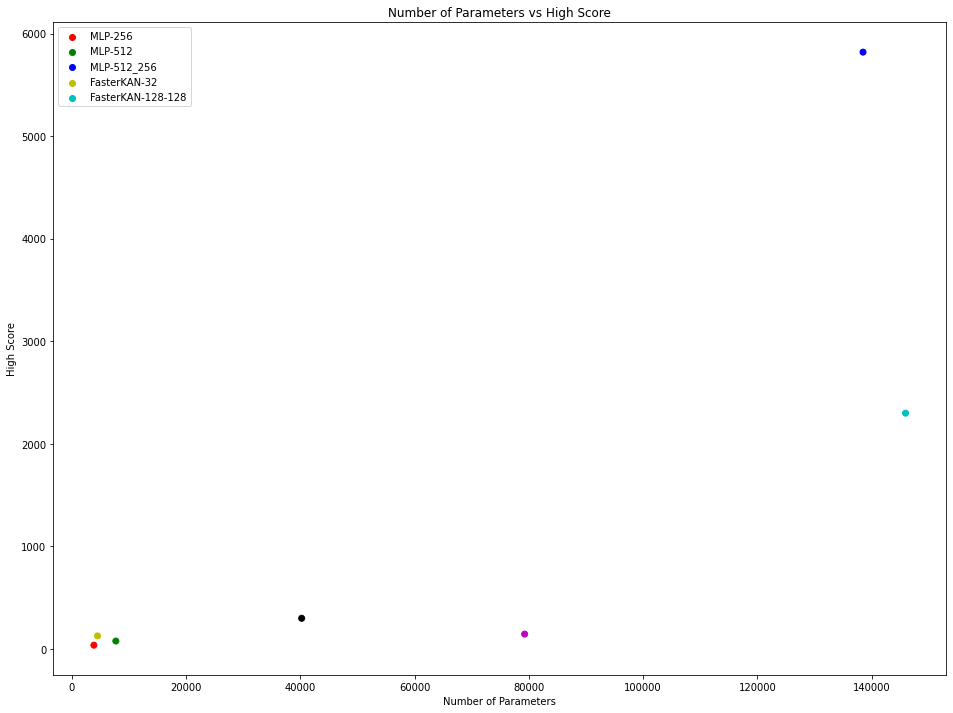

In [10]:
# Convert to numpy array
import numpy as np
mlp_256_scores_np = np.array(mlp_256_scores)
mlp_512_scores_np = np.array(mlp_512_scores)
mlp_512_256_scores_np = np.array(mlp_512_256_scores)
faster_kan_32_scores_np = np.array(faster_kan_32_scores)
faster_kan_128_128_scores_np = np.array(faster_kan_128_128_scores)
faster_kan_128_64_scores_np = np.array(faster_kan_128_64_scores)
faster_kan_64_64_scores_np = np.array(faster_kan_64_64_scores)
# Scatter plot of number of parameters vs high score, color each model differently
plt.figure(figsize=(16,12))
plt.scatter([num_params(model_mlp_256), num_params(model_mlp_512), num_params(model_mlp_512_256), num_params(model_kan_32), num_params(model_fasterkan_128_128), num_params(model_fasterkan_128_64), num_params(model_fasterkan_64_64)],
            [np.max(mlp_256_scores_np), np.max(mlp_512_scores_np), np.max(mlp_512_256_scores_np), np.max(faster_kan_32_scores_np), np.max(faster_kan_128_128_scores_np), np.max(faster_kan_128_64_scores_np), np.max(faster_kan_64_64_scores_np)],
            c=['r','g','b','y','c','m','k'])
plt.xlabel("Number of Parameters")
plt.ylabel("High Score")
plt.title("Number of Parameters vs High Score")
# Make a legend for the colors
plt.scatter([],[],c='r',label='MLP-256')
plt.scatter([],[],c='g',label='MLP-512')
plt.scatter([],[],c='b',label='MLP-512_256')
plt.scatter([],[],c='y',label='FasterKAN-32')
plt.scatter([],[],c='c',label='FasterKAN-128-128')
plt.legend()


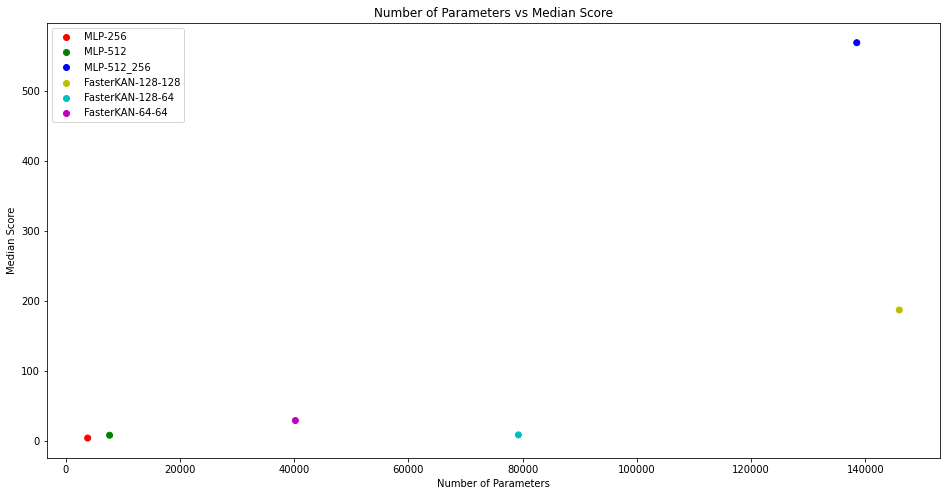

In [12]:
# Convert to numpy array
import numpy as np
# Scatter plot of number of parameters vs high score, color each model differently
plt.figure(figsize=(16,8))
plt.scatter([num_params(model_mlp_256), num_params(model_mlp_512), num_params(model_mlp_512_256), num_params(model_fasterkan_128_128), num_params(model_fasterkan_128_64), num_params(model_fasterkan_64_64)],
            [np.median(mlp_256_scores_np), np.median(mlp_512_scores_np), np.median(mlp_512_256_scores_np), np.median(faster_kan_128_128_scores_np), np.median(faster_kan_128_64_scores_np), np.median(faster_kan_64_64_scores_np)],
            c=['r','g','b','y','c','m'])
plt.xlabel("Number of Parameters")
plt.ylabel("Median Score")
plt.title("Number of Parameters vs Median Score")
# Make a legend for the colors
plt.scatter([],[],c='r',label='MLP-256')
plt.scatter([],[],c='g',label='MLP-512')
plt.scatter([],[],c='b',label='MLP-512_256')
plt.scatter([],[],c='y',label='FasterKAN-128-128')
plt.scatter([],[],c='c',label='FasterKAN-128-64')
plt.scatter([],[],c='m',label='FasterKAN-64-64')

plt.legend()


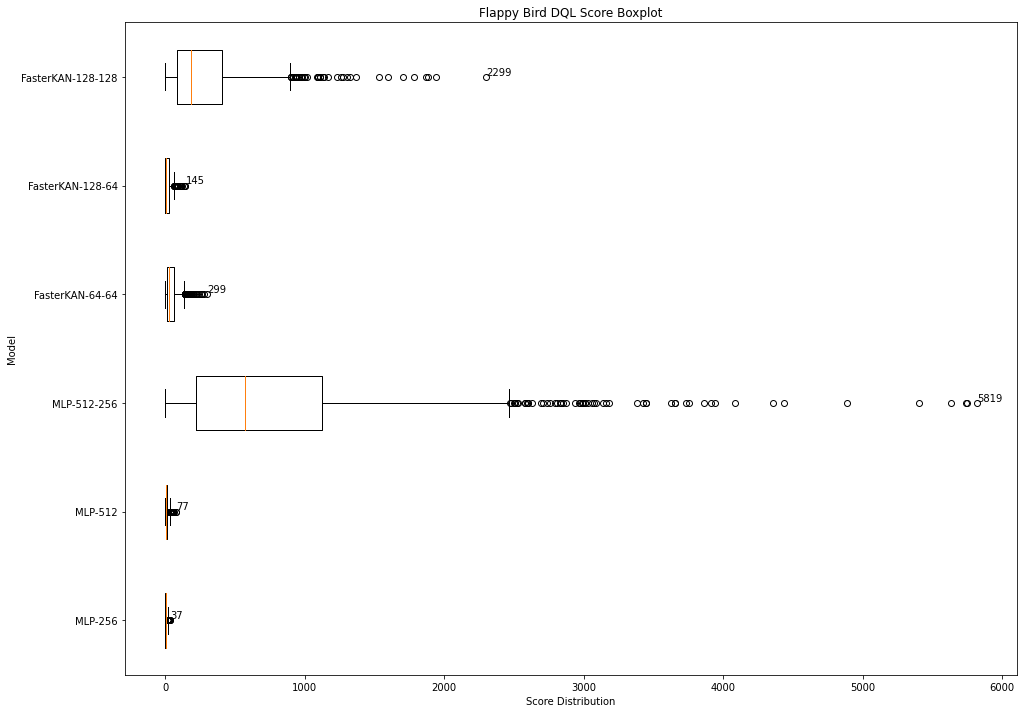

In [35]:
import matplotlib.pyplot as plt
# Plot box plot, horizontal
plt.figure(figsize=(16,12))
plt.boxplot([mlp_256_scores, mlp_512_scores, mlp_512_256_scores,faster_kan_64_64_scores,  faster_kan_128_64_scores,faster_kan_128_128_scores], vert=False,
            labels=["MLP-256", "MLP-512", "MLP-512-256","FasterKAN-64-64", "FasterKAN-128-64",  "FasterKAN-128-128"])
plt.xlabel("Score Distribution")
plt.ylabel("Model")
# Annotate the high score for each model on the plot
plt.annotate(f"{np.max(mlp_256_scores_np)}", (np.max(mlp_256_scores_np), 1), ha='left', va='bottom')
plt.annotate(f"{np.max(mlp_512_scores_np)}", (np.max(mlp_512_scores_np), 2), ha='left', va='bottom')
plt.annotate(f"{np.max(mlp_512_256_scores_np)}", (np.max(mlp_512_256_scores_np), 3), ha='left', va='bottom')
plt.annotate(f"{np.max(faster_kan_64_64_scores_np)}", (np.max(faster_kan_64_64_scores_np), 4), ha='left', va='bottom')
plt.annotate(f"{np.max(faster_kan_128_128_scores_np)}", (np.max(faster_kan_128_128_scores_np), 6), ha='left', va='bottom')
plt.annotate(f"{np.max(faster_kan_128_64_scores_np)}", (np.max(faster_kan_128_64_scores_np), 5), ha='left', va='bottom')
plt.title("Flappy Bird DQL Score Boxplot")
plt.show()